In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib

df=pd.read_csv("D:/train_data.csv")
print(df)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [4]:
print("Initial shape:", df.shape)
print(df['Loan_Status'].value_counts())

Initial shape: (614, 13)
Loan_Status
Y    422
N    192
Name: count, dtype: int64


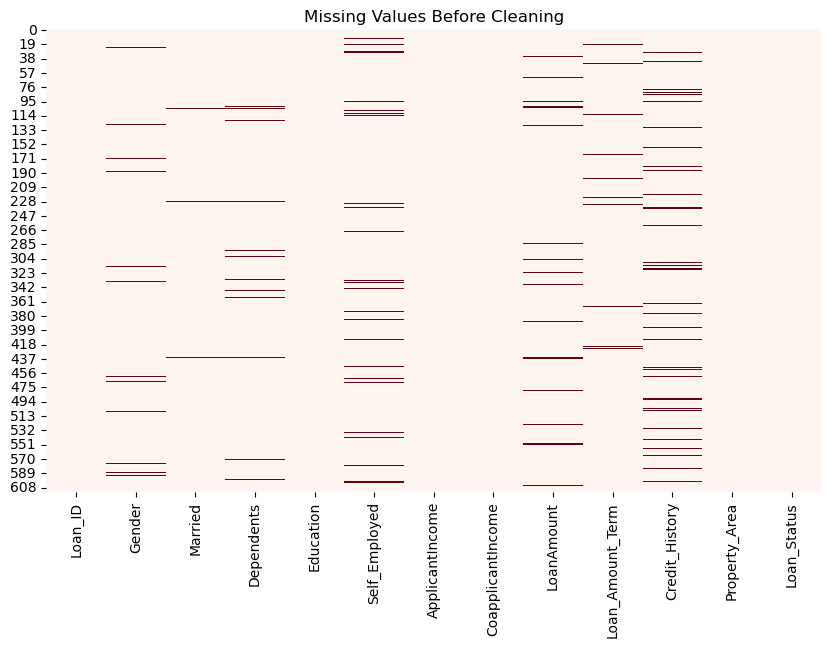

In [5]:
# Visualize missing values(before cleaning)
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Before Cleaning")
plt.show()

In [6]:
#DATA CLEANING

#Droping the not required column-not use for prediction
if 'Loan_ID' in df.columns:
    df.drop("Loan_ID", axis=1, inplace=True)
print(df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [7]:
#handling missing value
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col] = df[col].fillna(df[col].mode()[0])
print(df)  

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [8]:
#Fill the numeric column with mean
if df['LoanAmount'].notna().sum() > 0:
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
else:
    print("⚠️ 'LoanAmount' column is all NaNs — cannot compute median.")
    df['LoanAmount'] = df['LoanAmount'].fillna(0)  # or use a default value
print(df)  

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

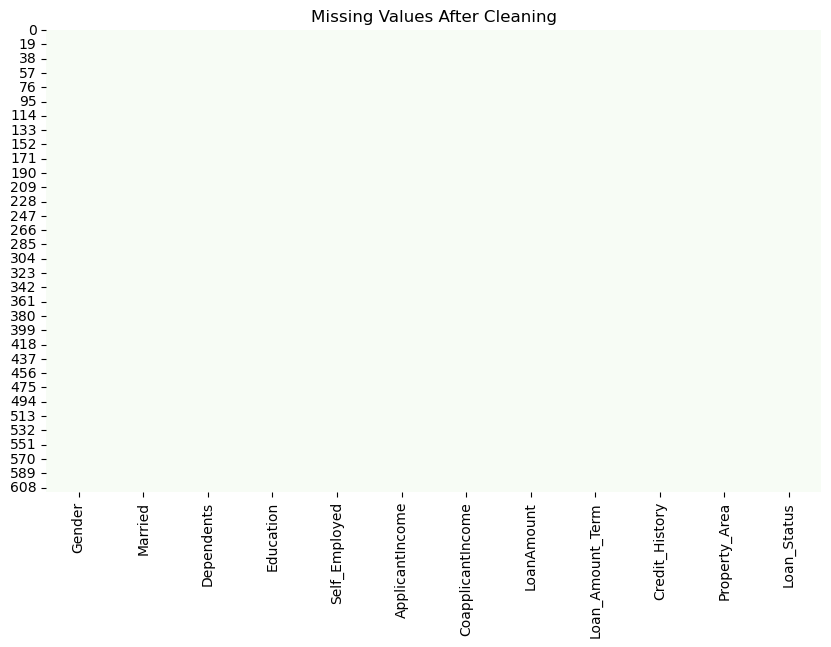

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='Greens')
plt.title("Missing Values After Cleaning")
plt.show()

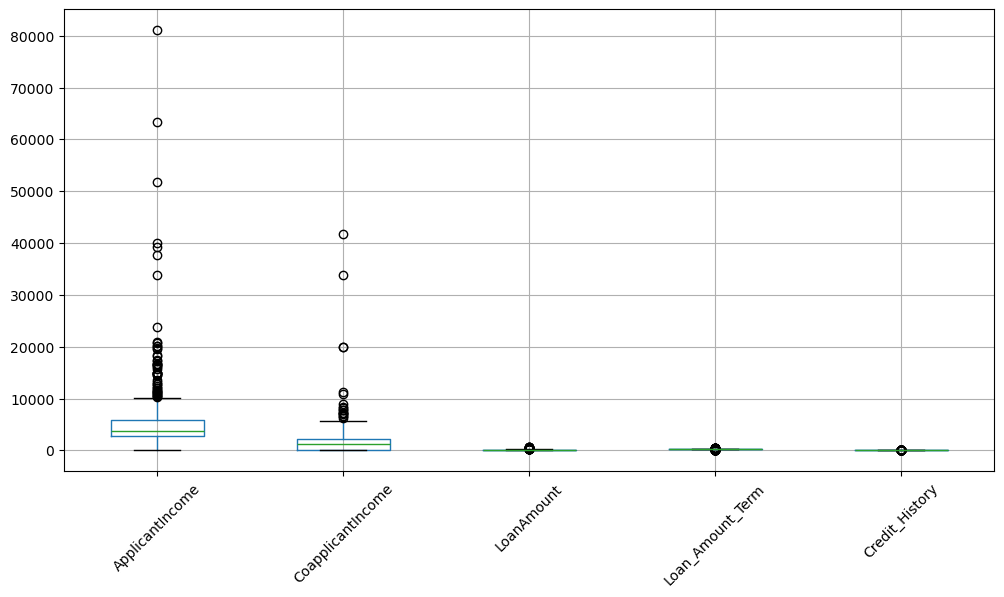

In [10]:
num_cols = df.select_dtypes(include='number').columns.tolist()
df.boxplot(column=num_cols, figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

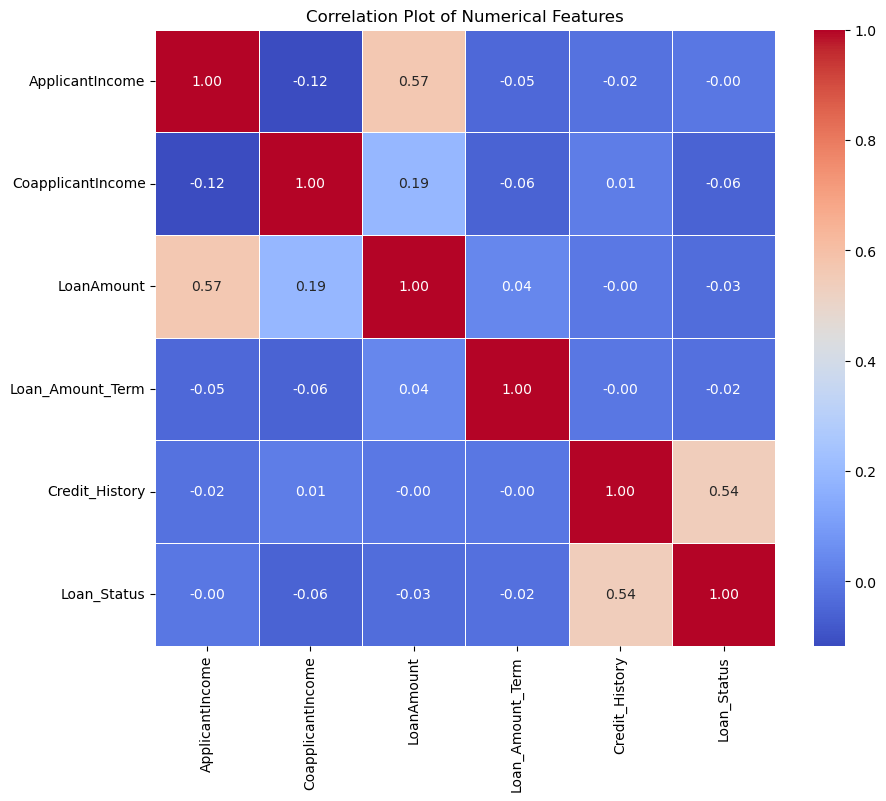

In [27]:
# Only include numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot of Numerical Features")
plt.show()


In [11]:
#ENCODE TARGET VARIABLE
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
print(df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [12]:
# IMBALANCE CHECK IN TARGET COLUMN

#counts of 1 and 0
print("Target Class Distribution:")
print(df['Loan_Status'].value_counts())

#instead of counts it shows percentage
print("\nPercentage Distribution:")
percentages = df['Loan_Status'].value_counts(normalize=True) * 100
print(percentages)

Target Class Distribution:
Loan_Status
1    422
0    192
Name: count, dtype: int64

Percentage Distribution:
Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64


In [13]:
# Report Imbalance
threshold = 60  #default 60,can adjust
if any(percentages > threshold):
    print("\nTarget column is imbalanced.")
    use_smote = True
else:
    print("\nTarget column is balanced.")
    use_smote = False


Target column is imbalanced.


In [14]:
# ONE-HOT ENCODE CATEGORICAL VARIABLES

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0               1.0            1         True  

In [15]:
#FEATURE AND TARGET SPLIT
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

#STRATIFIED TRAIN_TEST_SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# HANDLES THE IMBALANCE

from imblearn.over_sampling import SMOTE
if use_smote:
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

In [17]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)  # training data
X_test = scaler.transform(X_test)      

In [19]:
model = LogisticRegression(random_state=42, max_iter=5000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=5000, random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
# EVALUATE MODEL
print("\nModel Evaluation:")

acc = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {acc:.2f}%")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 78.05%

Confusion Matrix:
 [[23 20]
 [ 7 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.63        43
           1       0.78      0.91      0.84        80

    accuracy                           0.78       123
   macro avg       0.78      0.72      0.74       123
weighted avg       0.78      0.78      0.77       123



In [22]:
predicted_approved = sum(y_pred == 1)
predicted_not_approved = sum(y_pred == 0)

print(f"\nNumber of applications predicted as Approved: {predicted_approved}")
print(f"Number of applications predicted as Not Approved: {predicted_not_approved}")



Number of applications predicted as Approved: 93
Number of applications predicted as Not Approved: 30


In [23]:
import joblib
# Save the trained Logistic Regression model
# Save the trained Logistic Regression model
joblib.dump(model, 'loan_approval_model.pkl')

# Save the StandardScaler used during preprocessing
joblib.dump(scaler, 'scaler.pkl')

# Save the list of columns (after one-hot encoding)
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

print("\nModel, scaler, and column structure saved successfully!")
  



Model, scaler, and column structure saved successfully!
